In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
file = r'C:\Users\Joel\Dropbox\Institute of Data\IOD Class Work\capstone\data\Option 2 - Police Force Strength\use_of_force.csv'
data = pd.read_csv(file)
data.head()

C:\Users\Joel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,138,178,218) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


IncidentDate IncidentTime Incident Location: Street/Highway  \
0   2020-04-01     00:12:00                               Yes   
1   2020-04-01     01:30:00                               Yes   
2   2020-04-01     03:30:00                                No   
3   2020-04-01     04:25:00                                No   
4   2020-04-01     04:12:00                                No   

  Incident Location: Public Transport Incident Location: Retail Premises  \
0                                  No                                 No   
1                                  No                                 No   
2                                  No                                 No   
3                                  No                                 No   
4                                  No                                 No   

  Incident Location: Open ground (e.g. park, car park, field)  \
0                                                 No            
1                                                 No            
2                                                 No            
3                                                 No            
4                                                 No            

  Incident Location: Licensed Premises  \
0                                   No   
1                                   No   
2                                   No   
3                                   No   
4                                   No   

  Incident Location: Sports or Event Stadia  \
0                                        No   
1                                        No   
2                                        No   
3                                        No   
4                                        No   

  Incident Location: Hospital/A&E (non-mental-health setting)  \
0                                                 No            
1                                                 No            
2                                                 No            
3                                                 No            
4                                                 No            

  Incident Location: Mental Health Setting  ... SubjectInjured  \
0                                       No  ...             No   
1                                       No  ...             No   
2                                       No  ...             No   
3                                       No  ...             No   
4                                       No  ...             No   

  SubjectNatureOfInjury SubjectMedOffered SubjectMedProvided  \
0                   NaN               NaN                NaN   
1                   NaN               NaN                NaN   
2                   NaN               NaN                NaN   
3                   NaN               NaN                NaN   
4                   NaN               NaN                NaN   

  Outcome: Made off/escaped Outcome: Arrested Outcome: Hospitalised  \
0                        No               Yes                    No   
1                        No               Yes                    No   
2                        No               Yes                    No   
3                        No                No                    No   
4                        No               Yes                    No   

  Outcome: Detained - Mental Health Act Outcome: Fatality Outcome: Other  
0                                    No                No             No  
1                                    No                No            Yes  
2                                    No                No             No  
3                                    No                No            Yes  
4                                    No                No             No  

[5 rows x 271 columns]

In [3]:
data['Tactic 2'].fillna('finished', inplace = True)
data['Tactic 3'].fillna('finished', inplace = True)
data['Tactic 2'].head()

0                   finished
1    Tactical communications
2                   finished
3                   finished
4    Tactical communications
Name: Tactic 2, dtype: object

In [4]:
data['T1 Force'] = [0 if x == 'Compliant handcuffing' else 0 if x == 'Tactical communications' else 1 for x in data['Tactic 1']]
data['T2 Force'] = [0 if x == 'Compliant handcuffing' else 0 if x == 'Tactical communications' else 0 if x == 'finished' else 1 for x in data['Tactic 2']]
data['T3 Force'] = [0 if x == 'Compliant handcuffing' else 0 if x == 'Tactical communications' else 0 if x == 'finished' else 1 for x in data['Tactic 3']]
tactics = pd.DataFrame([data['T1 Force'], data['T2 Force'], data['T3 Force']]).T
tactics['Was Force Needed?'] = tactics.sum(axis = 1)
tactics['Was Force Needed?'] = [1 if x >= 1 else 0 for x in tactics['Was Force Needed?']]
data['Was Force Needed?'] = tactics['Was Force Needed?']
data['Was Force Needed?'].head()

0    0
1    1
2    1
3    1
4    1
Name: Was Force Needed?, dtype: int64

# Reasons for Use of Force Analysis

In [5]:
reasons = data[['Reason for Force: Protect self',
                'Reason for Force: Protect Public',
                'Reason for Force: Protect Subject',
                'Reason for Force: Protect Other Officers',
                'Reason for Force: Prevent Offence',
                'Reason for Force: Secure Evidence',
                'Reason for Force: Effect Search',
                'Reason for Force: Effect Arrest',
                'Reason for Force: Method of Entry',
                'Reason for Force: Remove Handcuffs',
                'Reason for Force: Prevent Harm', 
                'Reason for Force: Prevent Escape',
                'Reason for Force: Other',
                'Was Force Needed?']]
reasons.head()

Reason for Force: Protect self Reason for Force: Protect Public  \
0                            Yes                               No   
1                            Yes                               No   
2                            Yes                               No   
3                            Yes                              Yes   
4                            Yes                               No   

  Reason for Force: Protect Subject Reason for Force: Protect Other Officers  \
0                                No                                      Yes   
1                                No                                      Yes   
2                               Yes                                      Yes   
3                                No                                       No   
4                                No                                      Yes   

  Reason for Force: Prevent Offence Reason for Force: Secure Evidence  \
0                               Yes                               Yes   
1                               Yes                                No   
2                                No                                No   
3                                No                                No   
4                                No                                No   

  Reason for Force: Effect Search Reason for Force: Effect Arrest  \
0                             Yes                              No   
1                              No                             Yes   
2                              No                              No   
3                              No                              No   
4                              No                              No   

  Reason for Force: Method of Entry Reason for Force: Remove Handcuffs  \
0                                No                                 No   
1                                No                                 No   
2                                No                                Yes   
3                                No                                 No   
4                                No                                 No   

  Reason for Force: Prevent Harm Reason for Force: Prevent Escape  \
0                             No                              Yes   
1                             No                               No   
2                            Yes                               No   
3                             No                               No   
4                            Yes                               No   

  Reason for Force: Other  Was Force Needed?  
0                      No                  0  
1                      No                  1  
2                      No                  1  
3                      No                  1  
4                      No                  1

In [7]:
reasons = reasons[reasons['Was Force Needed?'] != 0]
reasons.sample(10)

Reason for Force: Protect self Reason for Force: Protect Public  \
146502                            Yes                              Yes   
21929                             Yes                              Yes   
54054                             Yes                              Yes   
77245                              No                              Yes   
19672                             Yes                               No   
26787                             Yes                              Yes   
101908                            Yes                               No   
102772                            Yes                               No   
111693                             No                               No   
129332                            Yes                              Yes   

       Reason for Force: Protect Subject  \
146502                               Yes   
21929                                Yes   
54054                                 No   
77245                                 No   
19672                                 No   
26787                                Yes   
101908                               Yes   
102772                                No   
111693                                No   
129332                               Yes   

       Reason for Force: Protect Other Officers  \
146502                                      Yes   
21929                                       Yes   
54054                                       Yes   
77245                                        No   
19672                                        No   
26787                                       Yes   
101908                                      Yes   
102772                                      Yes   
111693                                       No   
129332                                      Yes   

       Reason for Force: Prevent Offence Reason for Force: Secure Evidence  \
146502                                No                                No   
21929                                 No                               Yes   
54054                                Yes                                No   
77245                                Yes                                No   
19672                                 No                                No   
26787                                Yes                                No   
101908                               Yes                                No   
102772                                No                                No   
111693                                No                                No   
129332                               Yes                               Yes   

       Reason for Force: Effect Search Reason for Force: Effect Arrest  \
146502                              No                              No   
21929                              Yes                             Yes   
54054                              Yes                              No   
77245                               No                              No   
19672                              Yes                              No   
26787                               No                              No   
101908                              No                              No   
102772                              No                              No   
111693                              No                              No   
129332                             Yes                             Yes   

       Reason for Force: Method of Entry Reason for Force: Remove Handcuffs  \
146502                                No                                 No   
21929                                 No                                 No   
54054                                 No                                 No   
77245                                 No                                 No   
19672                                 No                                 No 

In [8]:
for i in reasons.columns:
    print(reasons[i].value_counts())

Yes    55930
No     12020
Name: Reason for Force: Protect self, dtype: int64
No     40247
Yes    27703
Name: Reason for Force: Protect Public, dtype: int64
Yes    36219
No     31731
Name: Reason for Force: Protect Subject, dtype: int64
Yes    54332
No     13618
Name: Reason for Force: Protect Other Officers, dtype: int64
Yes    34325
No     33625
Name: Reason for Force: Prevent Offence, dtype: int64
No     48767
Yes    19183
Name: Reason for Force: Secure Evidence, dtype: int64
No     43005
Yes    24945
Name: Reason for Force: Effect Search, dtype: int64
No     35437
Yes    32513
Name: Reason for Force: Effect Arrest, dtype: int64
No    67950
Name: Reason for Force: Method of Entry, dtype: int64
No     65978
Yes     1972
Name: Reason for Force: Remove Handcuffs, dtype: int64
Yes    36520
No     31430
Name: Reason for Force: Prevent Harm, dtype: int64
Yes    38708
No     29242
Name: Reason for Force: Prevent Escape, dtype: int64
No     67635
Yes      315
Name: Reason for Force: Other, d

In [11]:
reasons_values = {
    'protect_self': 55930,
    'proect_public': 27703,
    'protect_subject': 36219,
    'proect_other_officers': 54332,
    'prevent_offence': 34325,
    'secure_evidence': 19183,
    'effect_search': 24945,
    'effect_arrest': 67950,
    'method_of_entry': 0,
    'remove_handcuffs': 1972,
    'prevent_harm': 36520,
    'prevent_escape': 38708,
    'other': 315
}
reasons_list = list(reasons_values.keys())
reasons_counts = list(reasons_values.values())
d = {'reasons': reasons_list, 'counts': reasons_counts}

reason_counts_df = pd.DataFrame(data = d)
reason_counts_df.sort_values(by = 'counts', ascending = False, inplace = True)
reason_counts_df

reasons  counts
7           effect_arrest   67950
0            protect_self   55930
3   proect_other_officers   54332
11         prevent_escape   38708
10           prevent_harm   36520
2         protect_subject   36219
4         prevent_offence   34325
1           proect_public   27703
6           effect_search   24945
5         secure_evidence   19183
9        remove_handcuffs    1972
12                  other     315
8         method_of_entry       0

# Visualize data

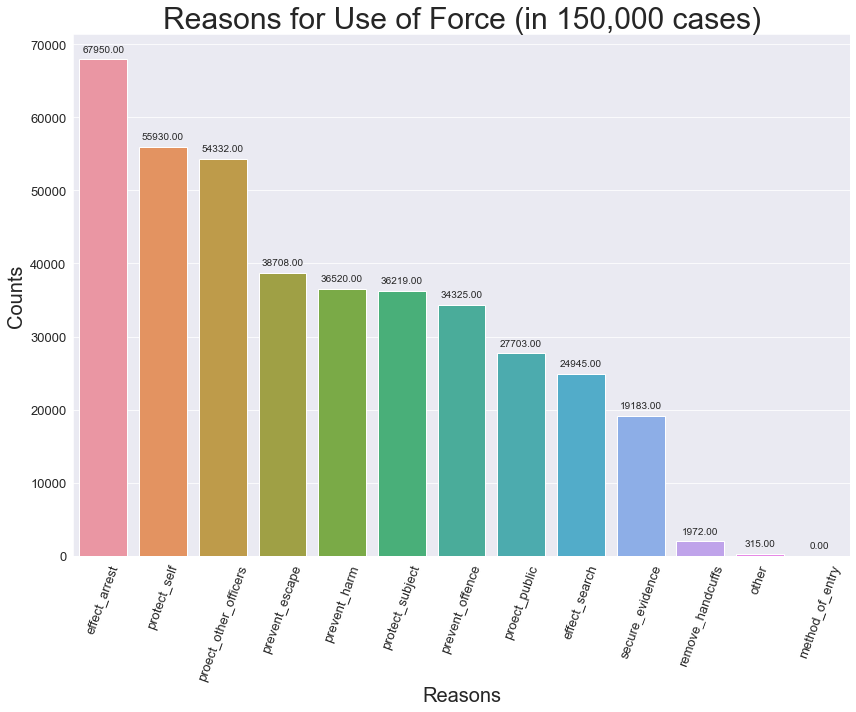

In [18]:
plt.figure(figsize=(12, 10))
ax = sns.set_style('darkgrid')
ax = sns.barplot(x=reason_counts_df['reasons'], y = reason_counts_df['counts'])
ax.set_xlabel('Reasons', fontsize = 20)
ax.set_ylabel('Counts', fontsize = 20)
ax.axes.set_title('Reasons for Use of Force (in 150,000 cases)', fontsize = 30)
plt.xticks(rotation = 70)
plt.tick_params(labelsize = 13)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.tight_layout()